# Project:- " House Prices: Advanced Regression Techniques "

### Objective: Predict sales prices and practice feature engineering, RFs, and gradient boosting

## Notebook - 1

### Dataset:
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

##### Attributes information
- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

## Project lifecycle:
1. Data Analysis & understanding
2. Feature engineering
3. Feature Selection
4. Model Building
5. Model Deployment

## 1. Data Analysis & Understanding:

- 1.1. Missing Values
- 1.2. Numerical variables
    - 1.21. Discrete variables
    - 1.22. Continuous variables
    - 1.23. Distribution of numerical variables
- 1.3. Categorical variables
    - 1.31. Cardinality of categorical variables
- 1.4. Outliers
- 1.5 Relationship between categorical & dependent variable..

## Building ML Pipelines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("C:/Users/Priyaranjan/Desktop/Kaggle datasets/Advanced House Price Prediction/train.csv")
df_test = pd.read_csv("C:/Users/Priyaranjan/Desktop/Kaggle datasets/Advanced House Price Prediction/test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print('training data shape: ',df_train.shape)
print('testing data shape: ',df_test.shape)

training data shape:  (1460, 81)
testing data shape:  (1459, 80)


- We can see the testing data has 1 column less ( the target variable: SalePrice )
- We have almost same number of datapoints in both datasets.

### 1.1. Exploring Missing values

In [6]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [7]:
features_with_na = [features for features in df_train.columns if df_train[features].isnull().sum() > 1]

for features in features_with_na:
    print(features, np.round(df_train[features].isnull().mean(),4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.5973 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


Lets analyze those missing values columns further to decide which ones can be imputed & which are not needed further.
- How many & which of them actually show significant deviation in median value for SalePrice of the house?
    - If we see strong deviation in median value for Sale Price of house due to null values, we will try to impute those values in some way. This will be dealt in 'Feature engineering' phase of the project.

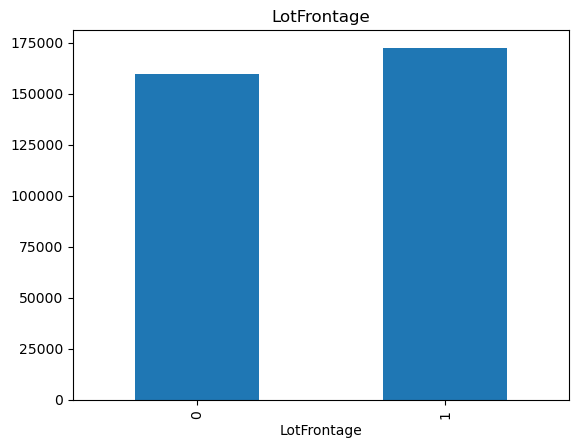

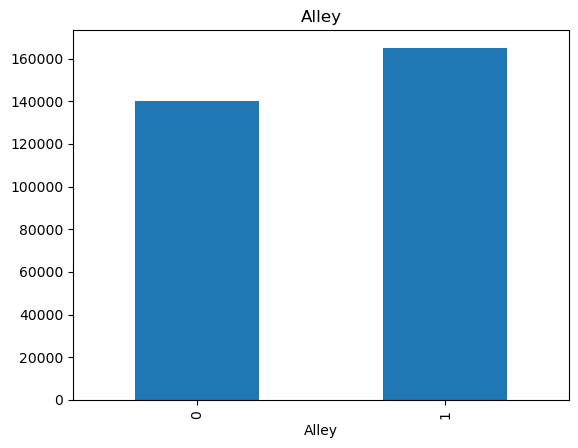

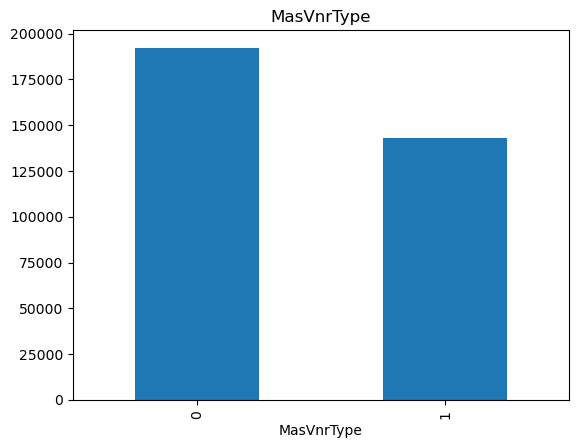

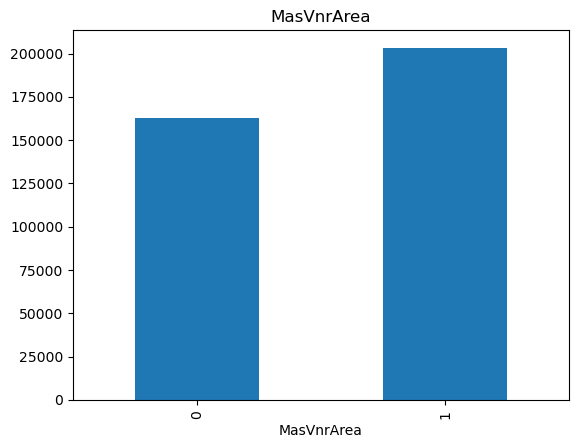

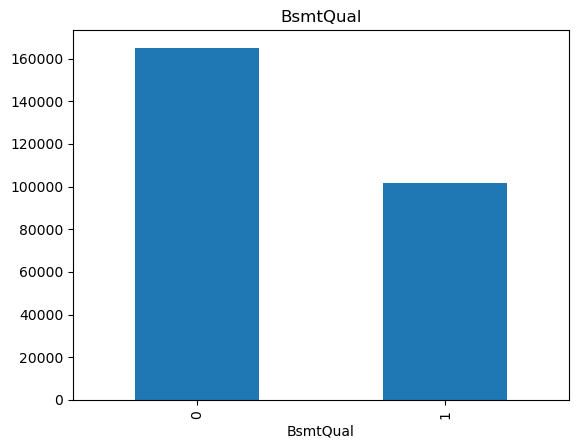

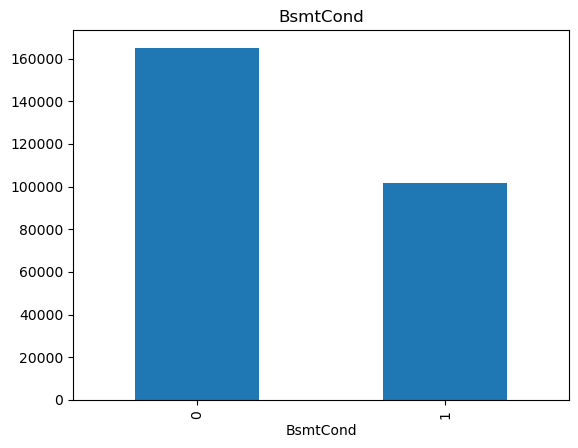

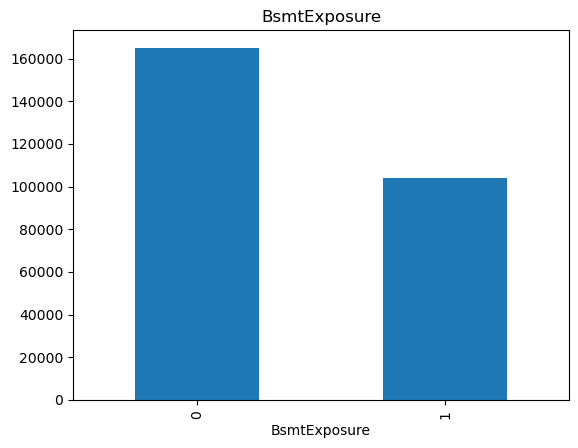

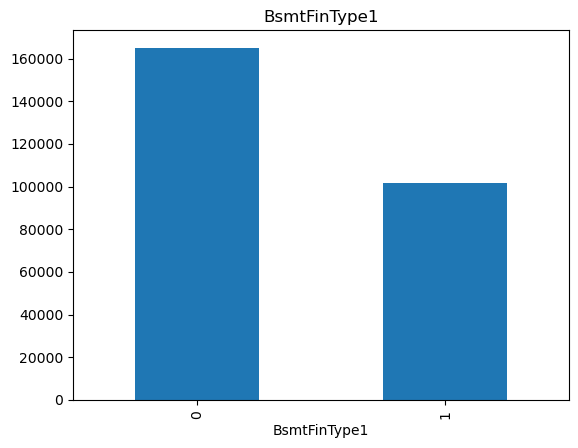

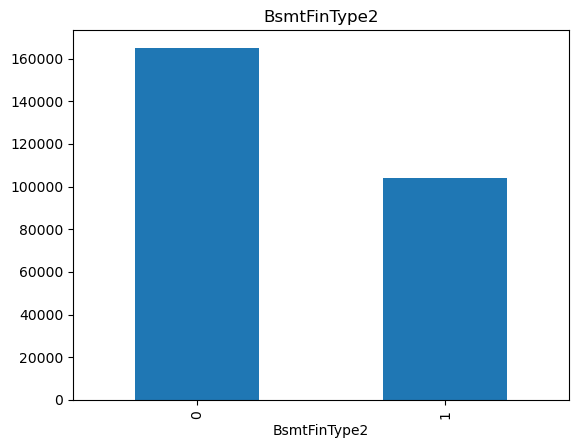

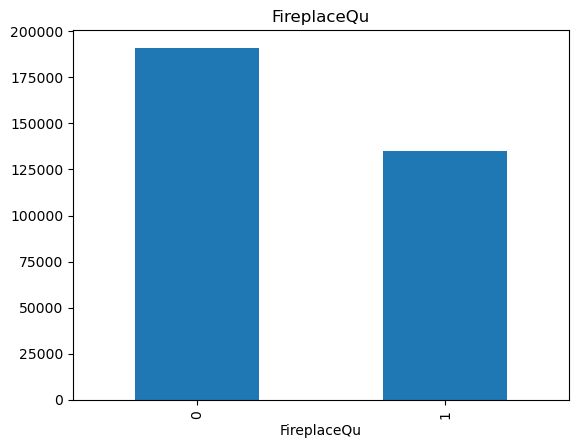

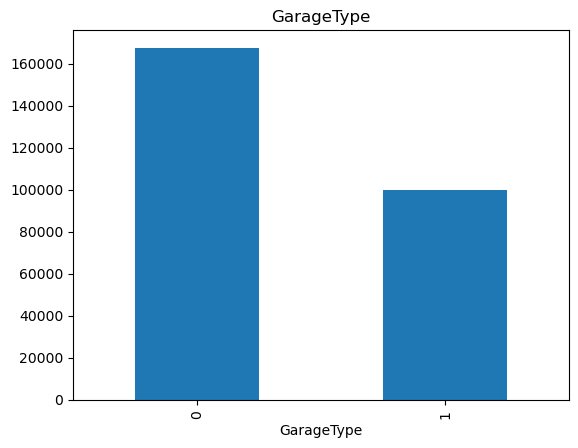

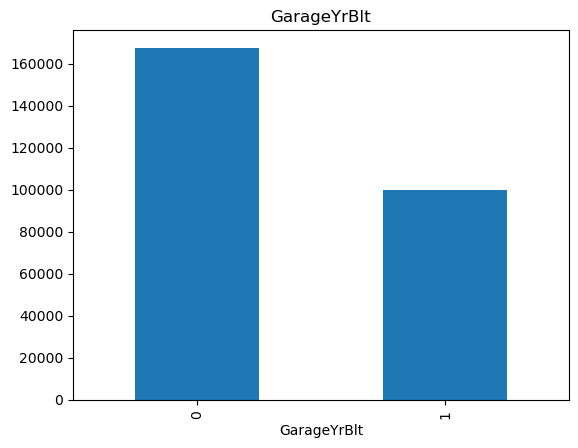

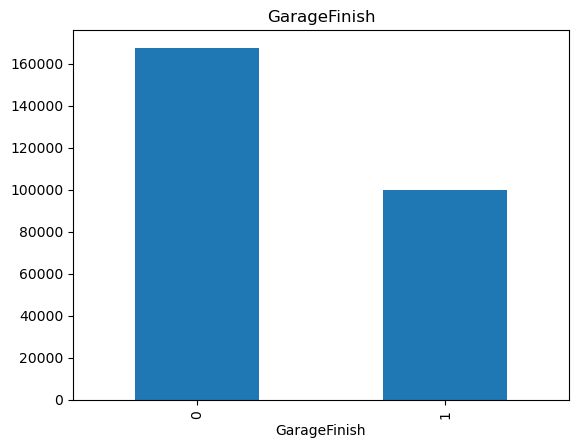

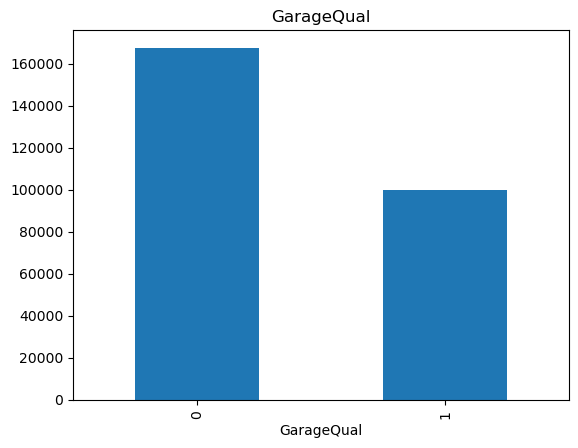

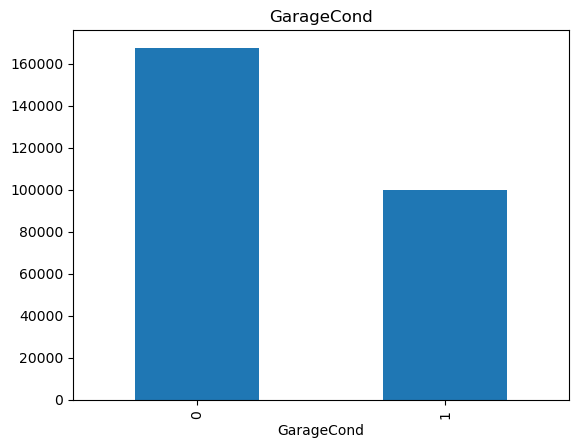

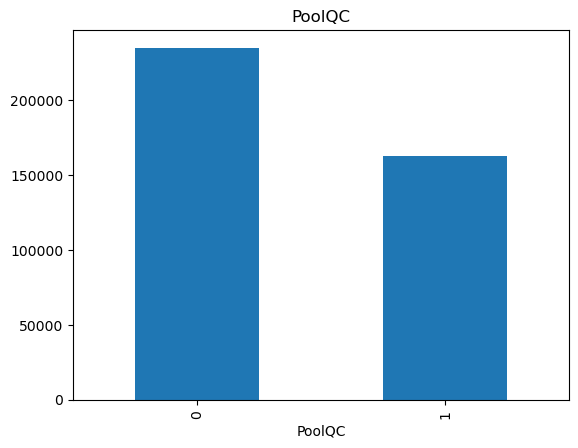

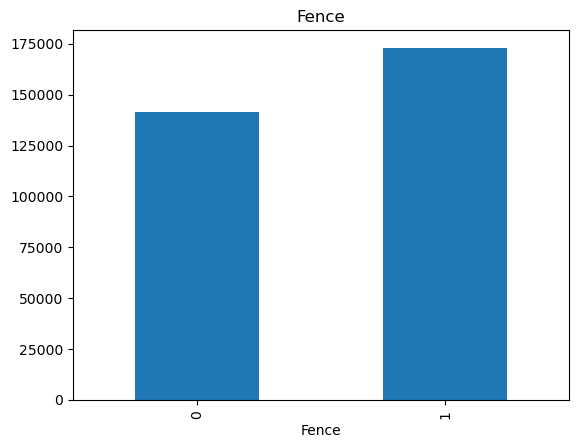

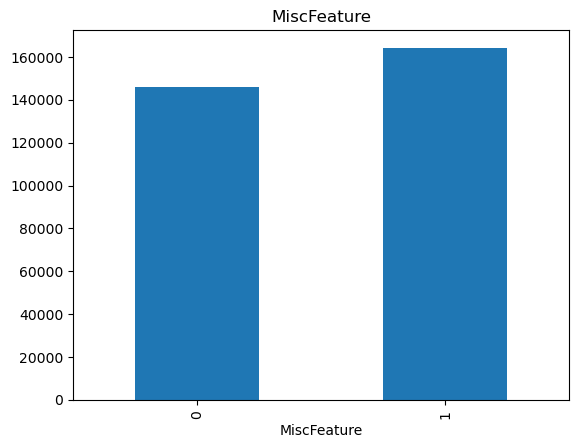

In [8]:
# copying the training data
data = df_train.copy()

# Replacing the null values in the columns with 1 & non-null values as 0
# plotting the median value for 'Sale Price' of house with respect to the null & non-null values in each column
for feature in features_with_na:  
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

***Finding:***
- We can see, that the null values in each of the column above is driving the median value for sales price of house quite more than the cases where non null values exist. So, this clearly explains that a relationship exists between those features & our dependent variable.
    - Hence, we would have to investigate more on these variables & try to impute values wherever possible.

### 1.2. Exploring Numerical Variables:

In [9]:
# get the features which are not of datatype object.
numerical_features = [feature for feature in df_train.columns if df_train[feature].dtypes != 'O']
print("Number of numerical features :{}".format(len(numerical_features)))

Number of numerical features :38


In [10]:
print(numerical_features)
df_train[numerical_features].head()

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


***Finding:*** Here, we have multiple 'Year' variables. 
Let's dig into those features.

In [11]:
#get the features with 'Year' or 'Yr' in variable names & check ther datatypes
year_features = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]
print('Year features :',year_features)
for feature in year_features:
    print("{} : {}".format(feature, df_train[feature].dtypes))

Year features : ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']
YearBuilt : int64
YearRemodAdd : int64
GarageYrBlt : float64
YrSold : int64


In [12]:
for feature in year_features:
    print("{} : {}".format(feature, df_train[feature].dtypes))

YearBuilt : int64
YearRemodAdd : int64
GarageYrBlt : float64
YrSold : int64


These features are of int & float type, which is wrong as it should be of datatype 'datetime'.
- So that, we can find some relationship of SalePrice of the house with respect to time(days, months, years).

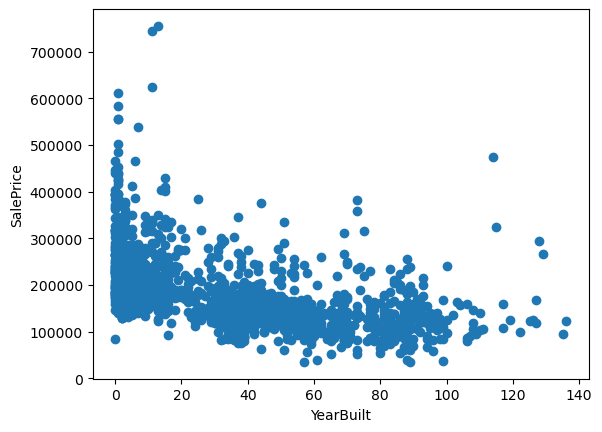

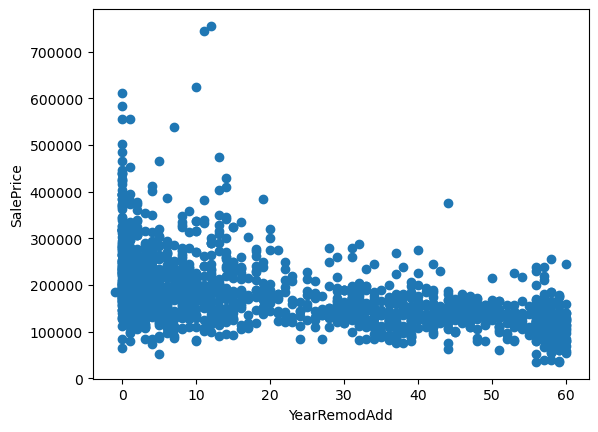

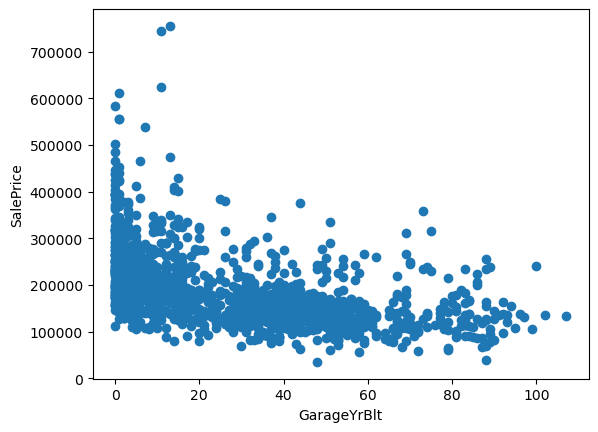

In [13]:
data = df_train.copy()
for feature in year_features:
    if feature != 'YrSold':
        data[feature] = data['YrSold'] - data[feature]
        
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

***Findings: Year variables relationships***

We can see the similar pattern in all of the numerical features we considered above with respect to the SalePrice of the house. 
- The less the time difference between sold year & built year, the price is more & then it decreases.

1. The houses to be sold at highest prices can be expected the most in the first 20 years of its build (original construction date). 
The SalePrice goes as high as more than 700000 USD.

2. As the house age increases, the chance of prices to fall is more . 
As from data, they are expected to fall to a range of 10000 USD to 40000 USD.

3. If the houses are remodeled/renovated recently (in a period of last 10 years), the prices are expected to go up into range of 20000 USD to 60000 USD.

4. If the garage was built recently (in a period of last 15 years), the price of house is expected to go up.
***Garage is a desirable feature which customers look for in a house.***


In [14]:
df_train['YearBuilt'].max()

2010

In [15]:
df_train[df_train['YearBuilt'] == 2010]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
378,379,20,RL,88.0,11394,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,New,Partial,394432


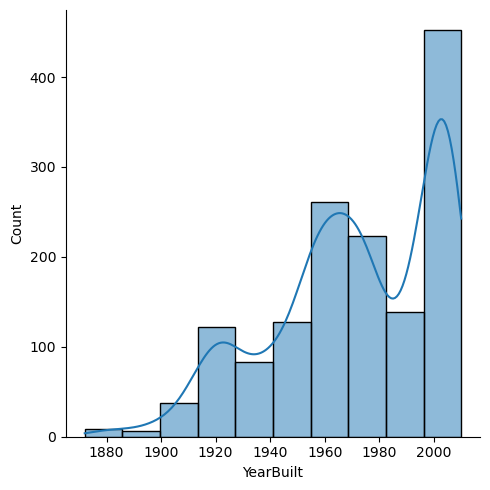

In [16]:
sns.displot(df_train['YearBuilt'],kde=True,bins=10)

***Finding:***
- ***Every 10 years, we can see a pattern of variation in number of new houses being built.***
- The first big jump in number of new houses was seen in ***1920 - 1930***, followed by in ***1950 - 1960*** time period & then ***2000 - 2010*** with the highest jump till date.
    - This ***can be explained by economic boom during those time periods***, as when the economic growth is good; the real estate companies take more loans from banks to build new projects or houses, in hope for the customers to buy them resulting in profit for the companies. 
    - Customers are expected to buy more houses during those times due to 2 possible reasons: 
        - Traditionally ***a house/ property is seen as a very lucrative investment for people.***
        - If economic growth is good, it means the money lending & recovery machinery is working well, which enables the banks or financial institutions to lend more money to the public in hope for good return which will inturn encourage the public to buy more houses & also encourage builders to build more.

### 1.21. Discrete variables : Analysis

In [17]:
# Discrete variables
# Identifying discrete features: if the feature has less than 25 unique values(excluding the year features)

discrete_features = [feature for feature in numerical_features if len(df_train[feature].unique()) < 25 and feature not in year_features]
print('Number of discrete features: {}'.format(len(discrete_features)))

Number of discrete features: 17


In [18]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [19]:
df_train[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


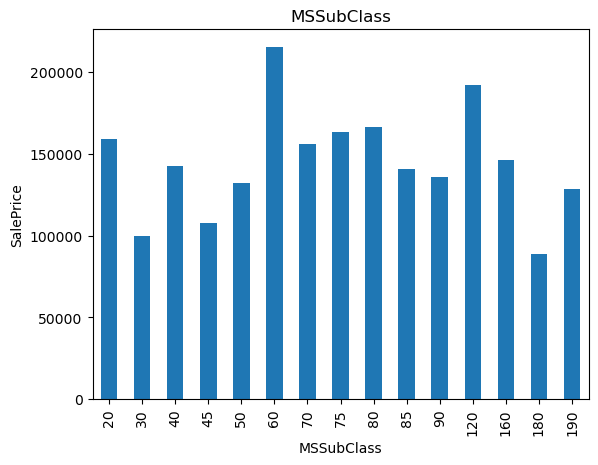

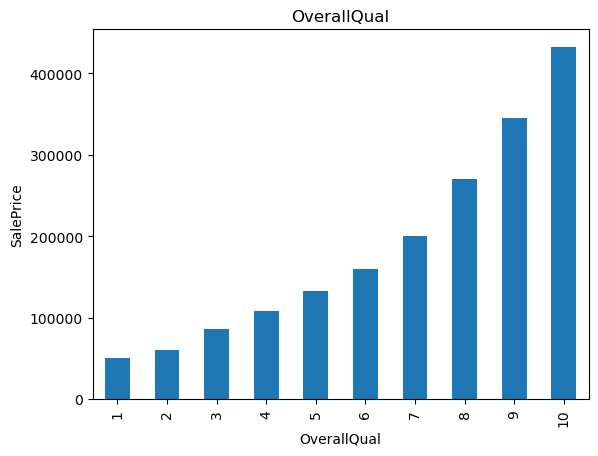

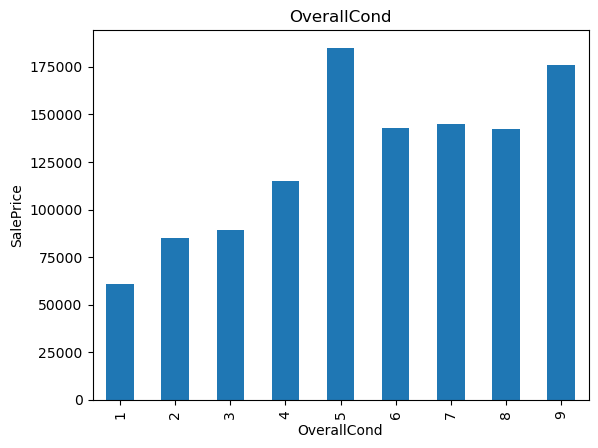

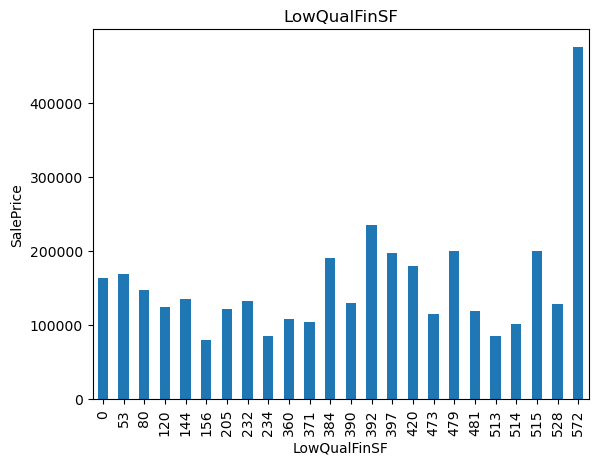

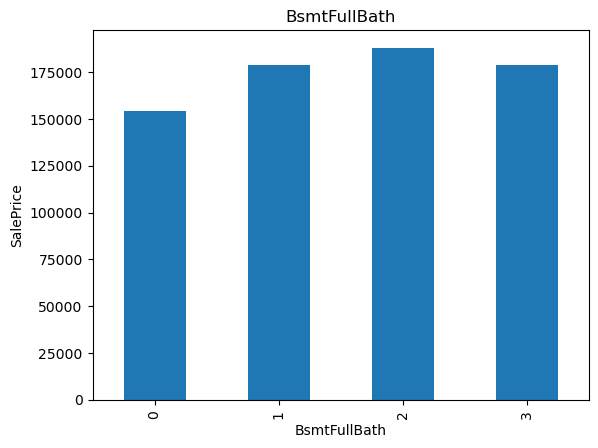

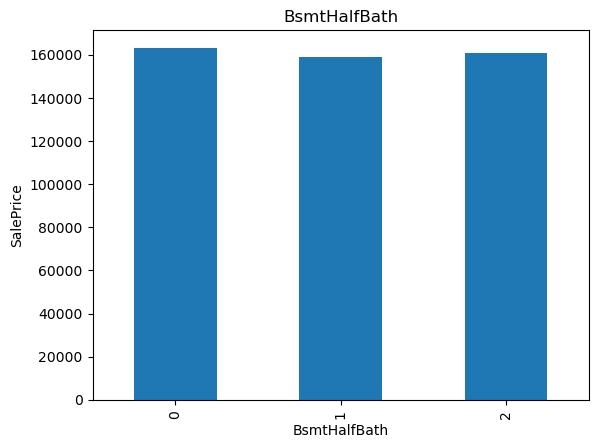

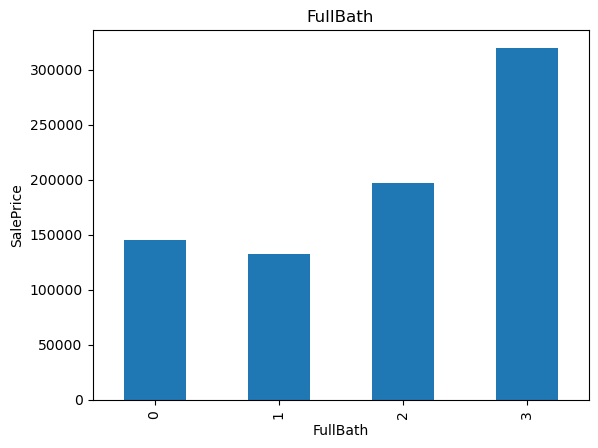

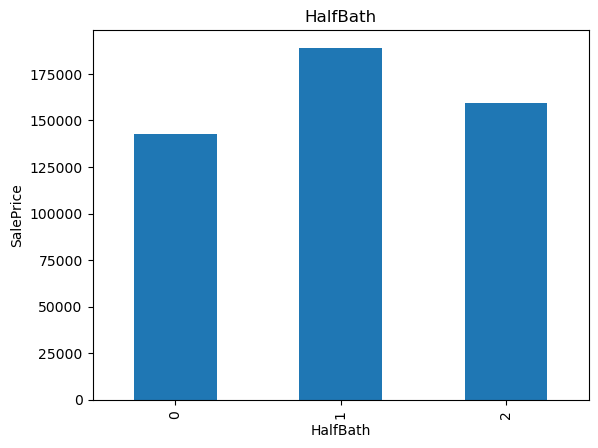

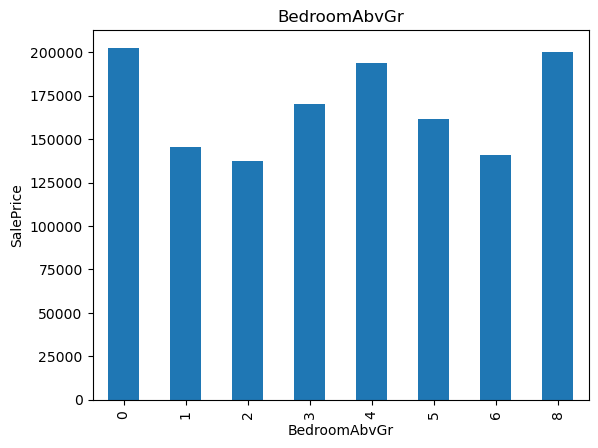

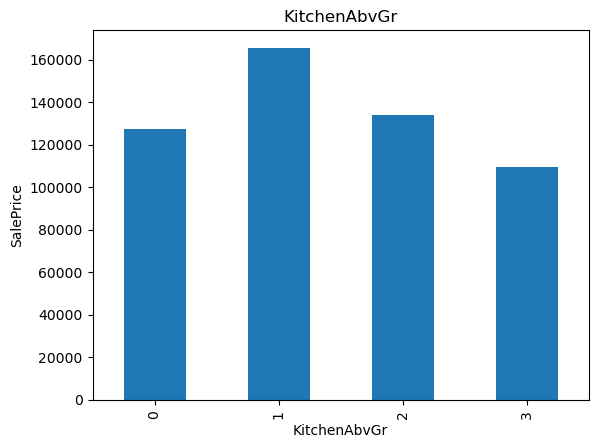

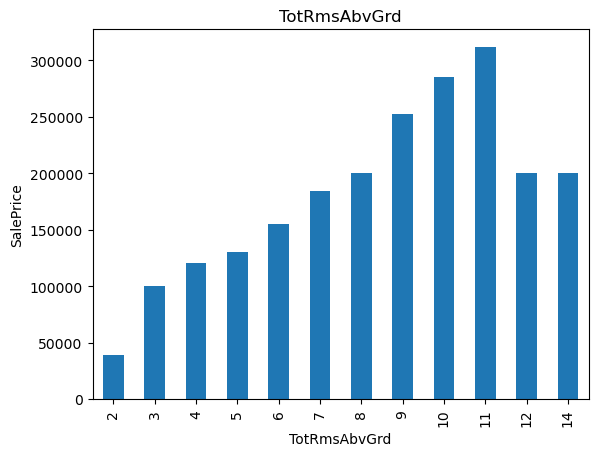

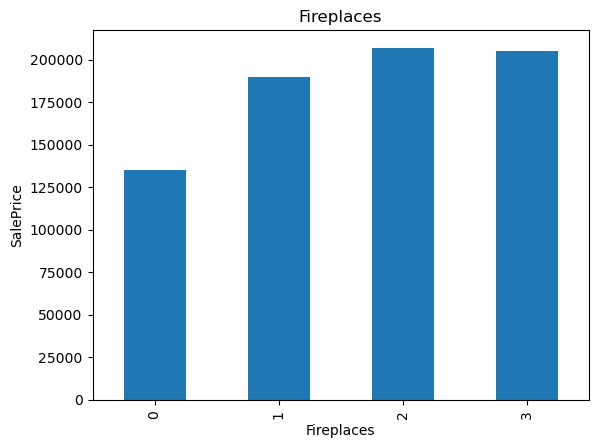

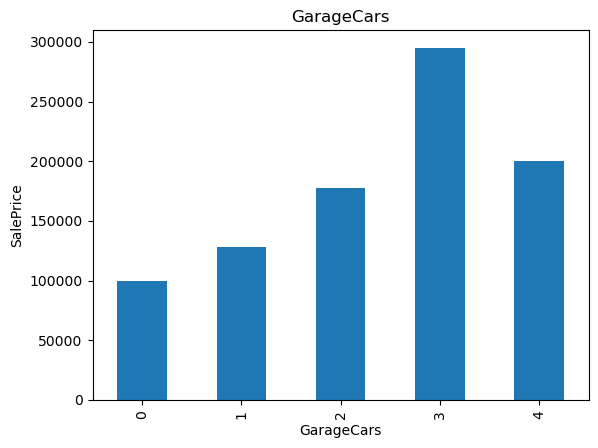

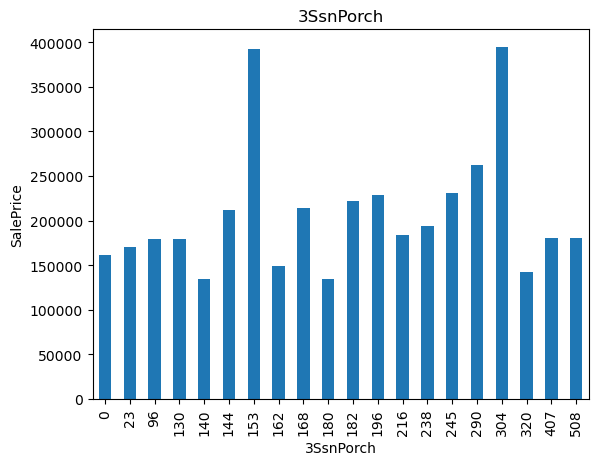

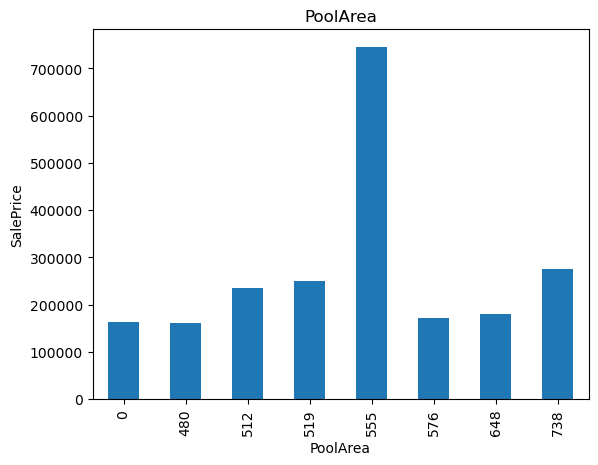

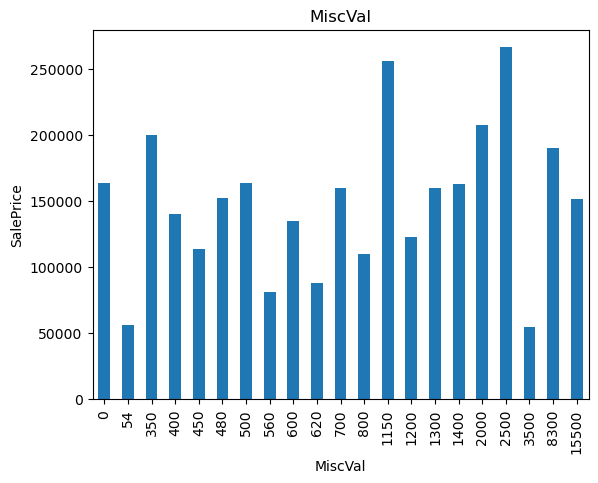

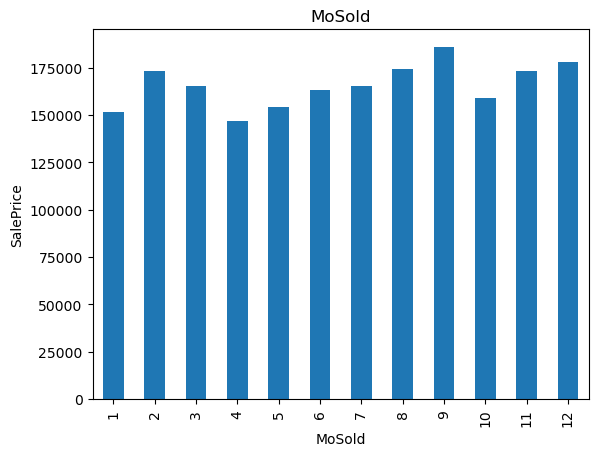

In [20]:
data = df_train.copy()
for feature in discrete_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

***Findings:***
- MSSubCLass: The Building class
    - Buildings of class 60 & 120 are the most expensive ones- median values ranging from ***170,000 USD to more than 200,000 USD.***
    - Buildings of class 80 are the cheapest in comparision to other classes with median sale price ***less than 100,000 USD.***
- OverallQual: Overall material and finish quality
    - The higher the material & finish quality in a house, the more expensive it gets.We see a exponential relationship here.
    - Buildings which have material & finish quality of 10 have price of ***more than 400,000 USD.***
- OverallCond: Overall condition of house
    - Usually the better the overall condition, more the sale price should be but here we can see houses with overall condition rating of 5 have the highest prices, followed by condition rating of 9.
    - This behaviour might be due to numerous other factors , for instance; locality of the house. 
        - For example, a house in the country-side is expected to be less expensive than a house in the heart of a city. In this scenario, even if a house in country-side is of condition rating 9 & less expensive, it will be less preferred for a customer wanting a house of decent condition( rating 5 ) in the heart of the city even if it costs more.
- LowQualFinSF: Low quality finished square feet (all floors)----------

### 1.22. Continuous variables: Analysis

In [21]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features and 
                       feature not in year_features and
                       feature != 'Id']
print("Number of continuous features: {}".format(len(continuous_features)))

Number of continuous features: 16


In [22]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

### 1.23. Distribution of Numeric variables:

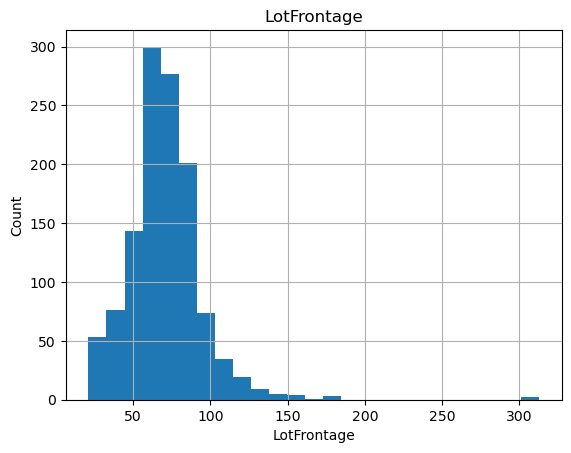

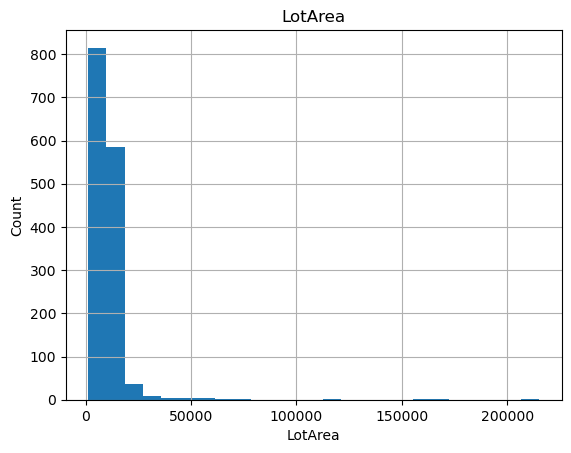

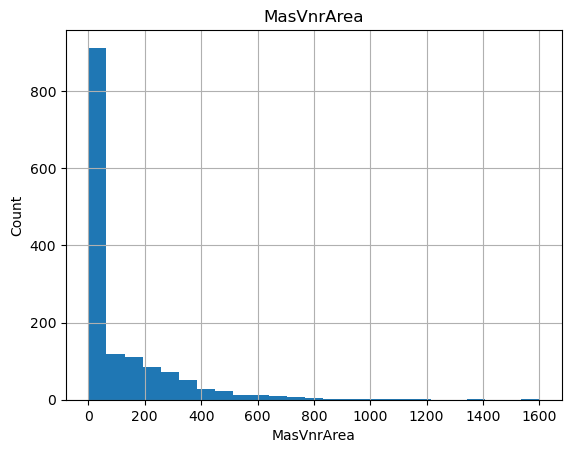

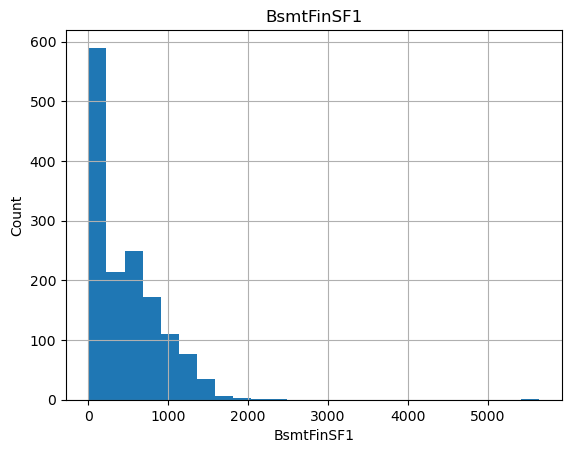

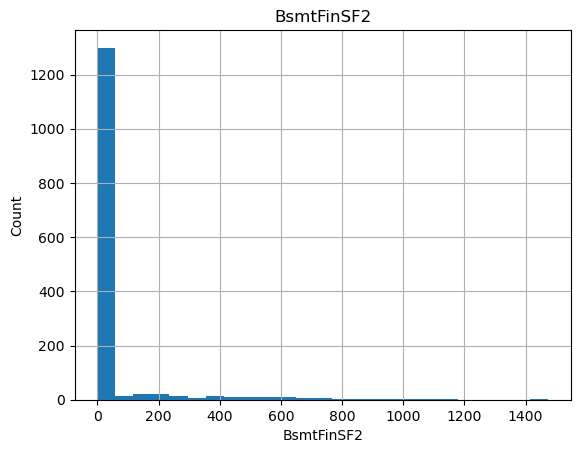

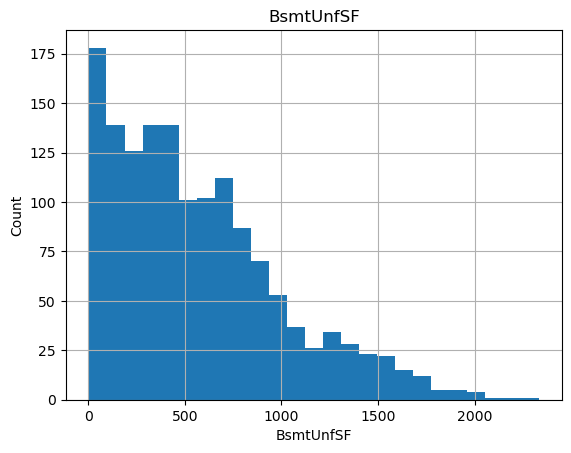

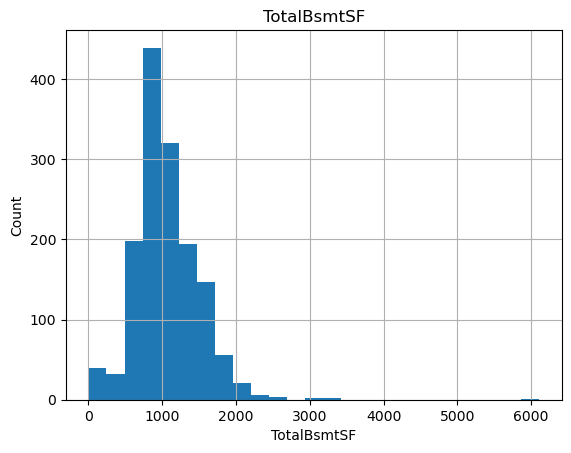

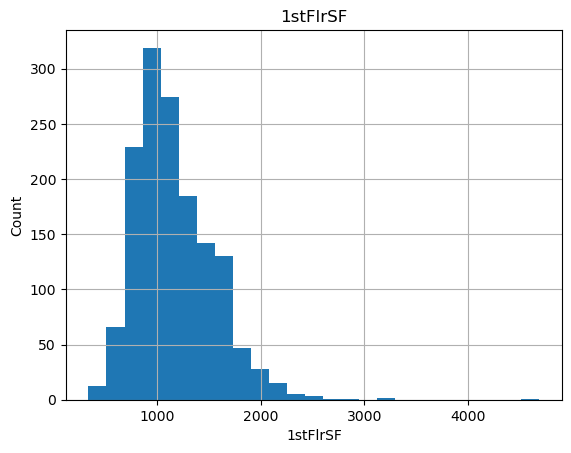

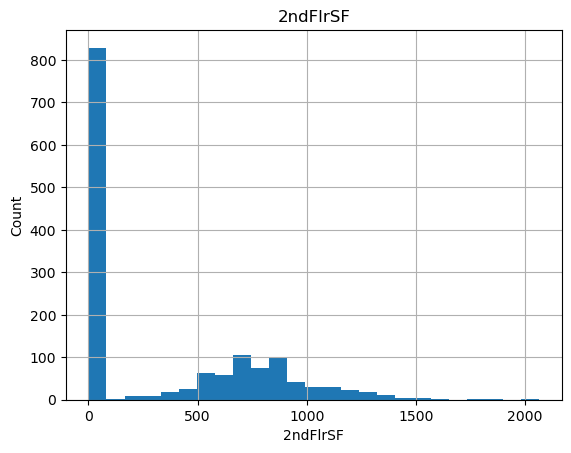

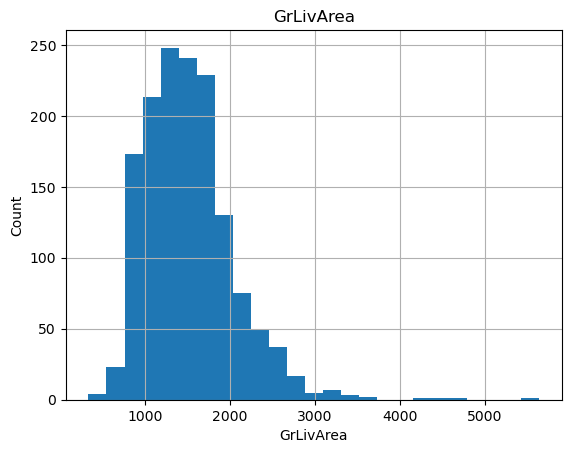

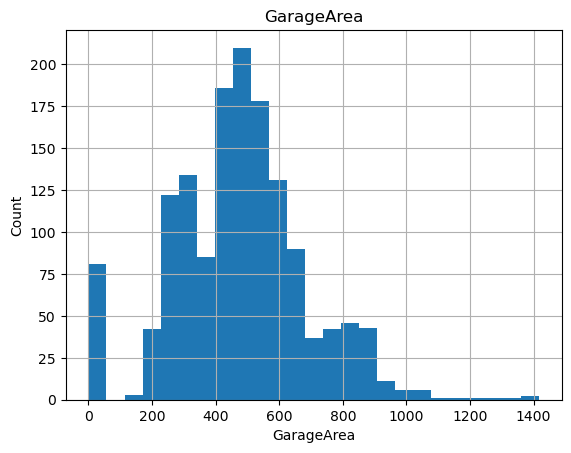

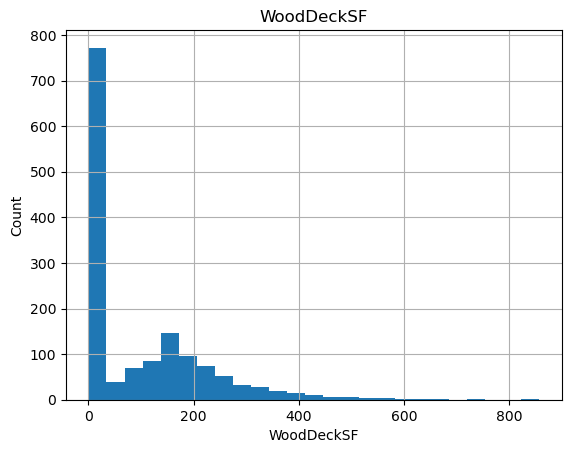

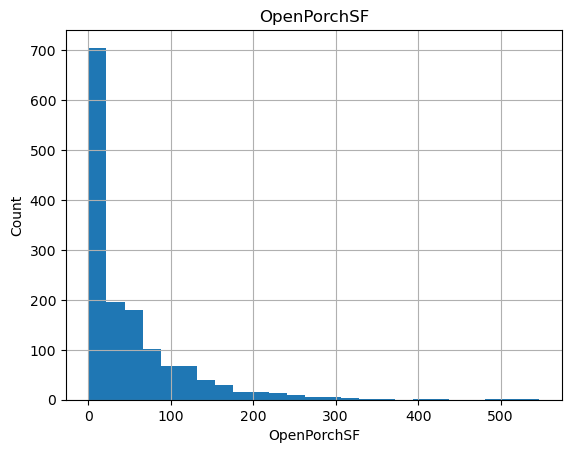

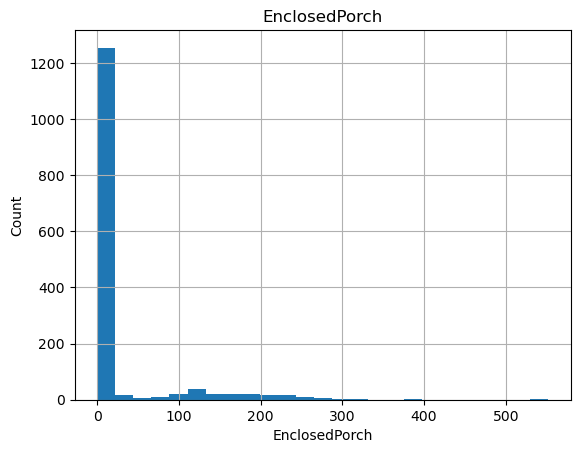

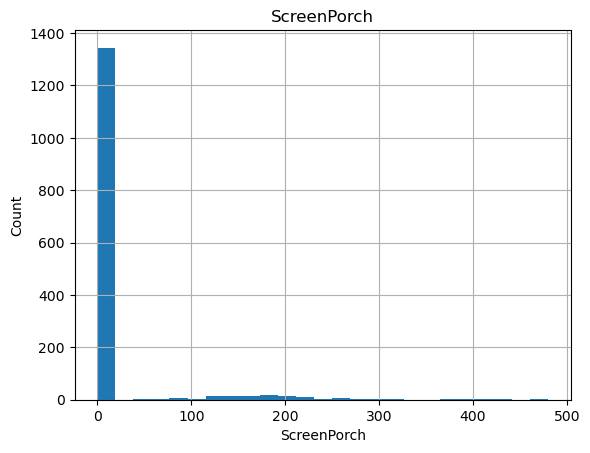

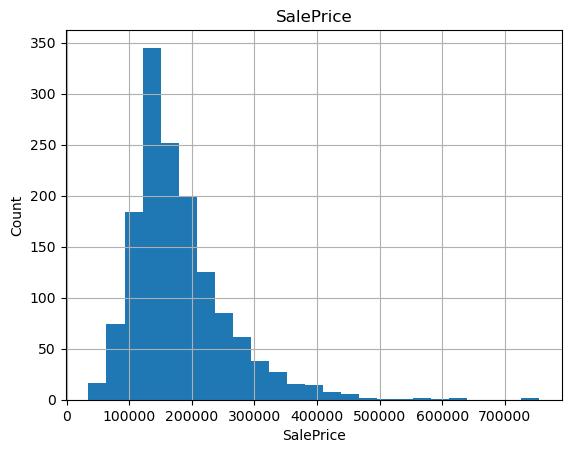

In [23]:
data = df_train.copy()
for feature in continuous_features:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

***Findings:***
- We have some variables like 'LotFrontage', 'TotalBsmtSF', 'SalePrice' having near-normal distributions.
- The other variables are needed to be normalized in order to bring them to a normal distribution.

***Log Transformations:***


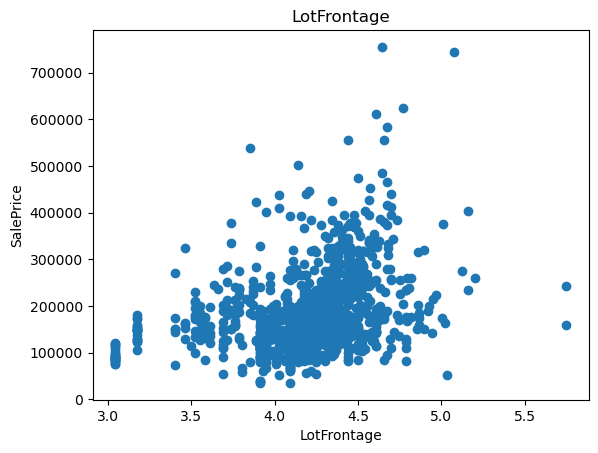

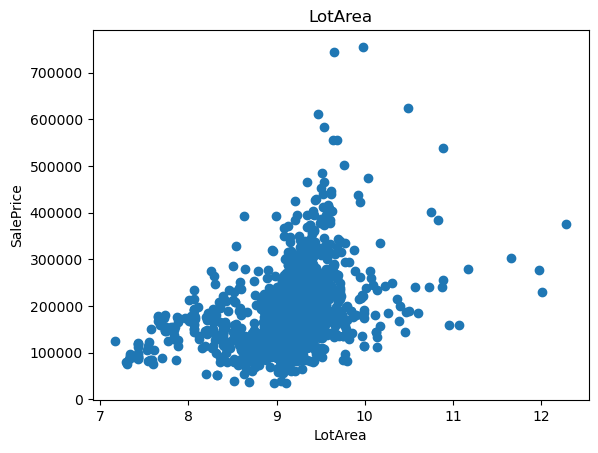

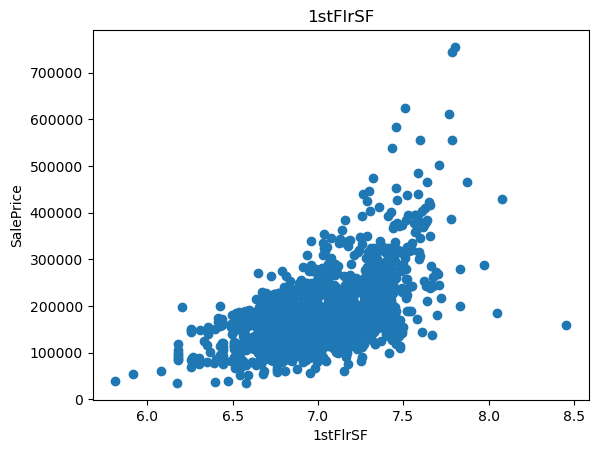

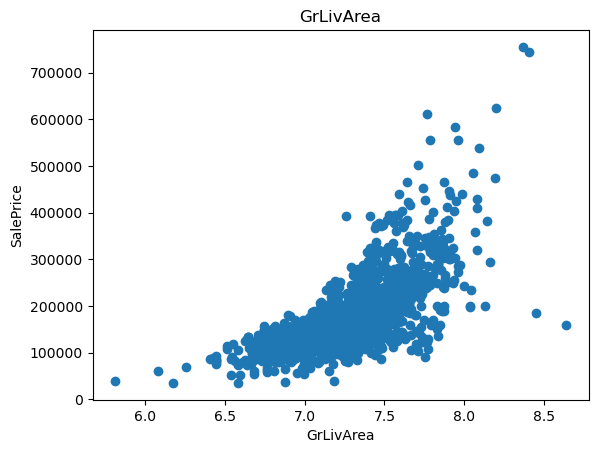

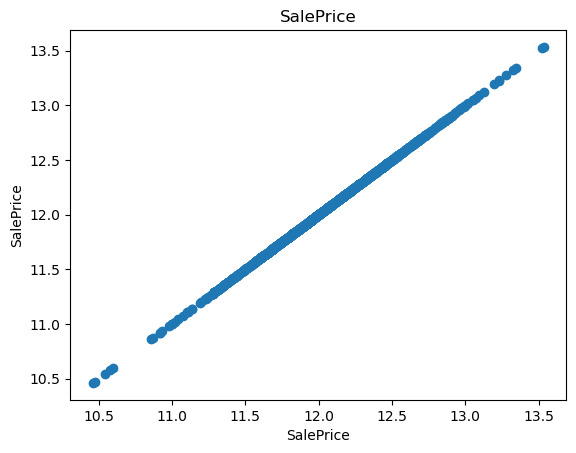

In [24]:
data = df_train.copy()
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

***Findings:***
- We can see positive correlation in values for 'LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea' with 'SalePrice' of the house.

### 1.3. Categorical variables: 

In [25]:
categorical_features = [feature for feature in df_train.columns if df_train[feature].dtypes == 'O']
print('Number of categorical variables: {}'.format(len(categorical_features)))
categorical_features

Number of categorical variables: 43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
df_train[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


### 1.3.1. Cardinality of categorical variables

In [27]:
for feature in categorical_features:
    print('Feature "{}" has {} unique categories'.format(feature,df_train[feature].nunique()))

Feature "MSZoning" has 5 unique categories
Feature "Street" has 2 unique categories
Feature "Alley" has 2 unique categories
Feature "LotShape" has 4 unique categories
Feature "LandContour" has 4 unique categories
Feature "Utilities" has 2 unique categories
Feature "LotConfig" has 5 unique categories
Feature "LandSlope" has 3 unique categories
Feature "Neighborhood" has 25 unique categories
Feature "Condition1" has 9 unique categories
Feature "Condition2" has 8 unique categories
Feature "BldgType" has 5 unique categories
Feature "HouseStyle" has 8 unique categories
Feature "RoofStyle" has 6 unique categories
Feature "RoofMatl" has 8 unique categories
Feature "Exterior1st" has 15 unique categories
Feature "Exterior2nd" has 16 unique categories
Feature "MasVnrType" has 3 unique categories
Feature "ExterQual" has 4 unique categories
Feature "ExterCond" has 5 unique categories
Feature "Foundation" has 6 unique categories
Feature "BsmtQual" has 4 unique categories
Feature "BsmtCond" has 4 un

### 1.4. Outliers:

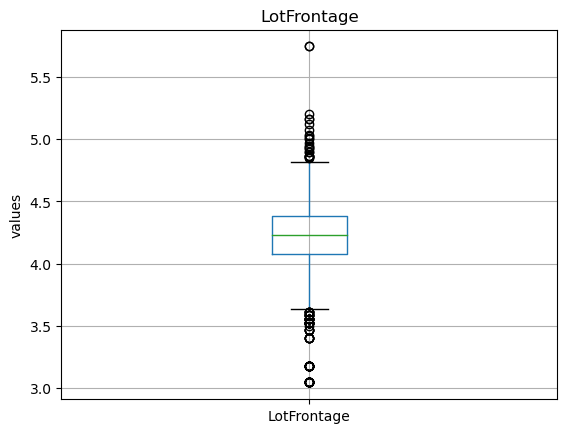

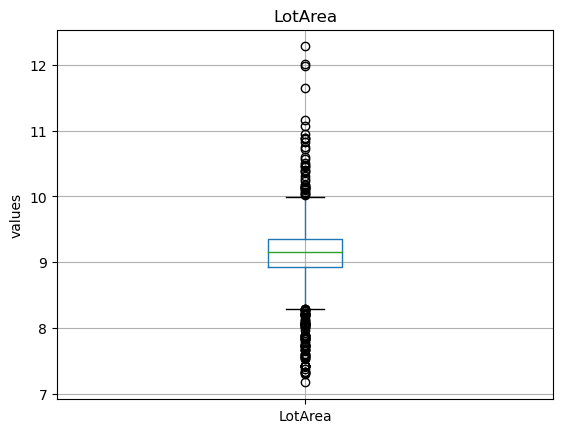

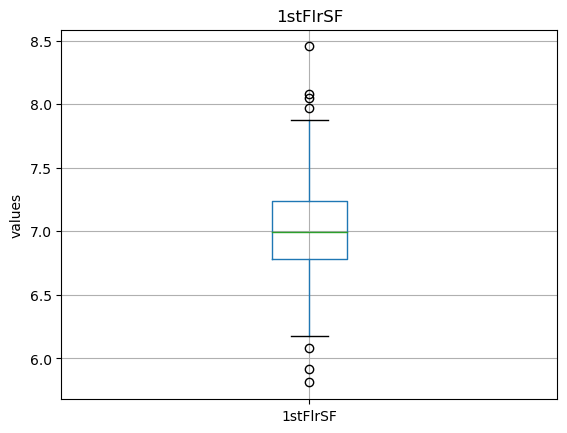

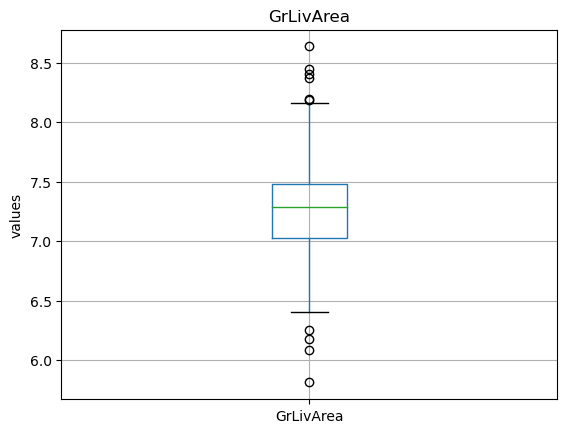

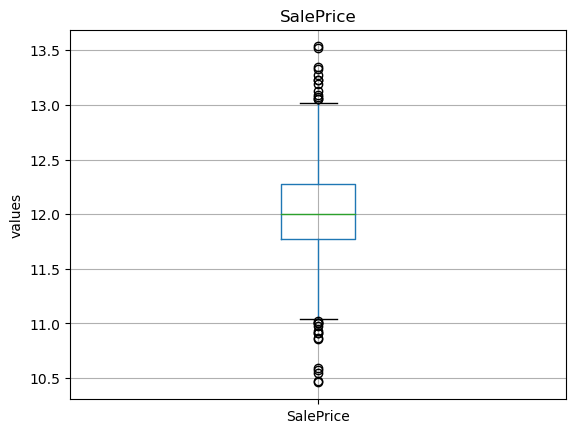

In [28]:
data = df_train.copy()
for feature in continuous_features:
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel('values')
        plt.title(feature)
        plt.show()
    

***Findings:***
- We have lot of outliers in columns: 'LotFrontageArea', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'.

### 1.5. Relationship between Categorical & dependent variable:

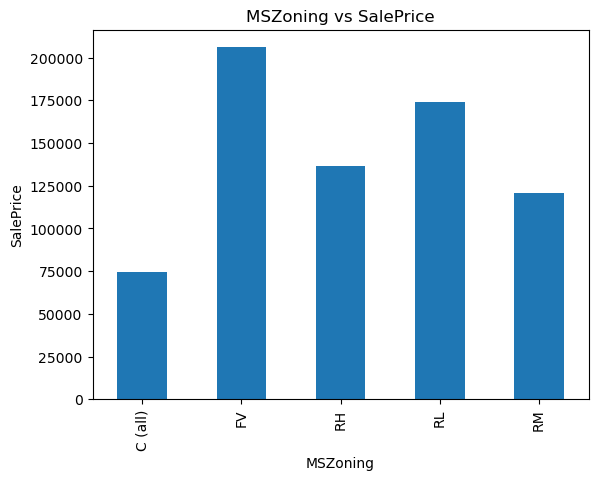

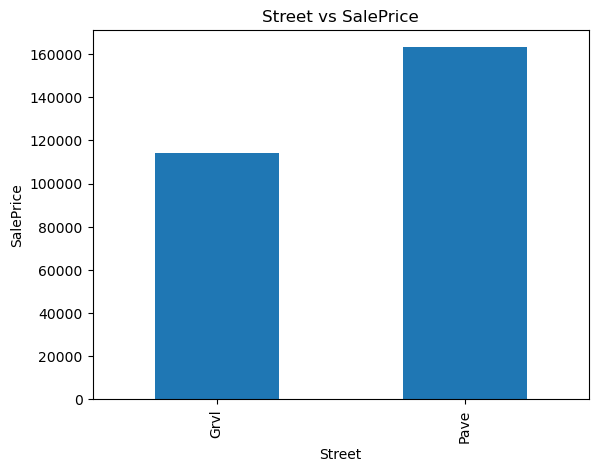

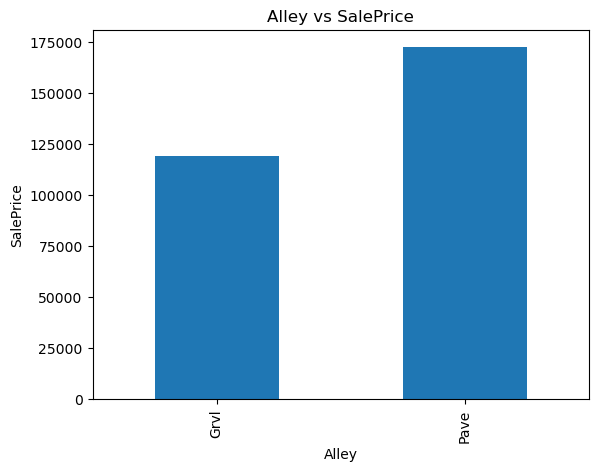

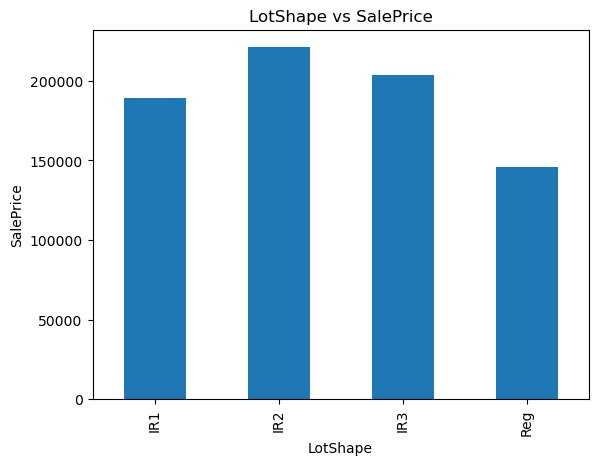

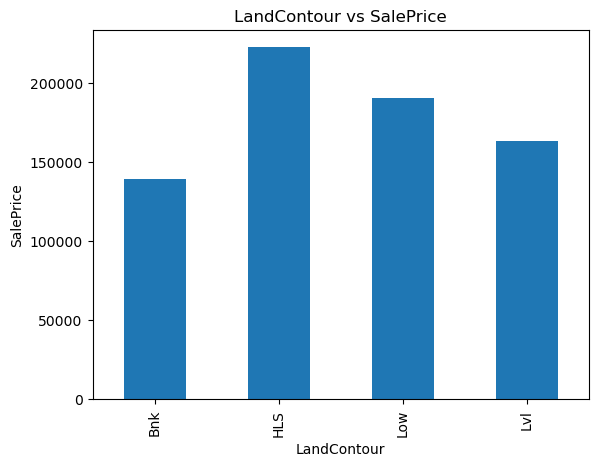

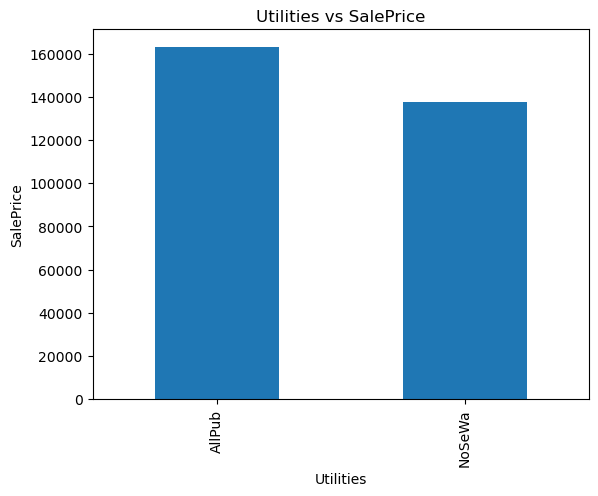

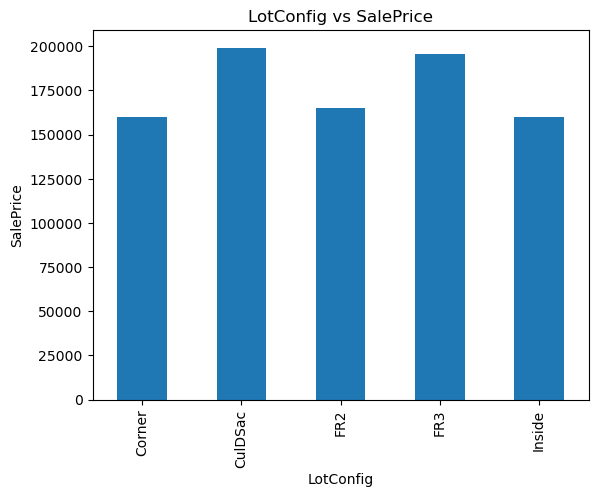

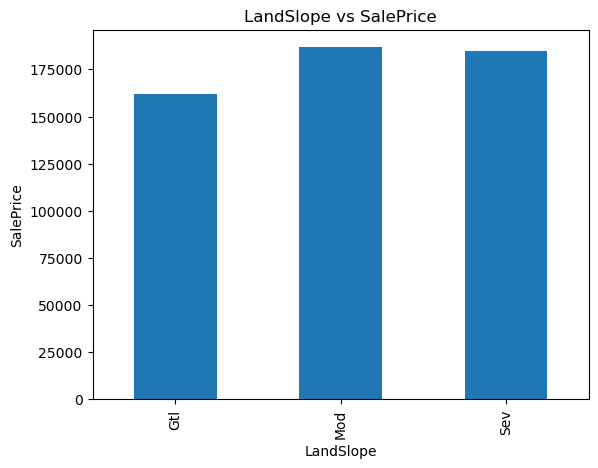

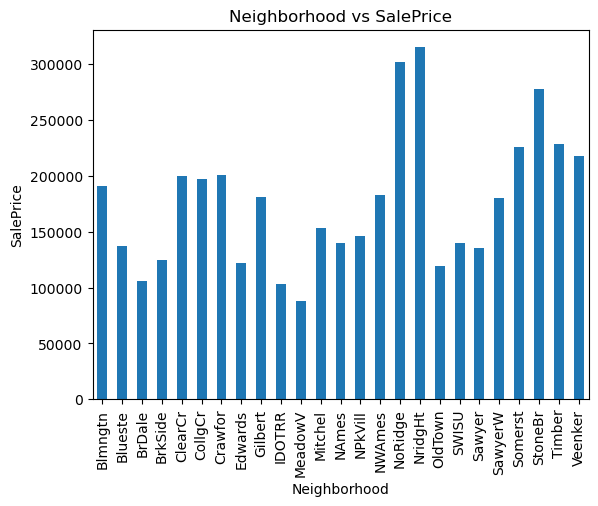

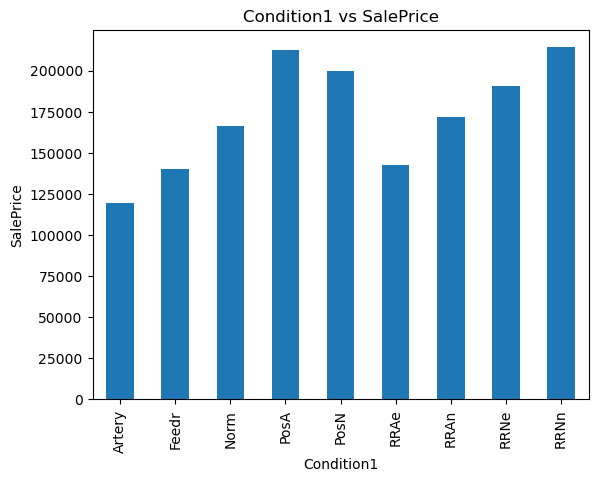

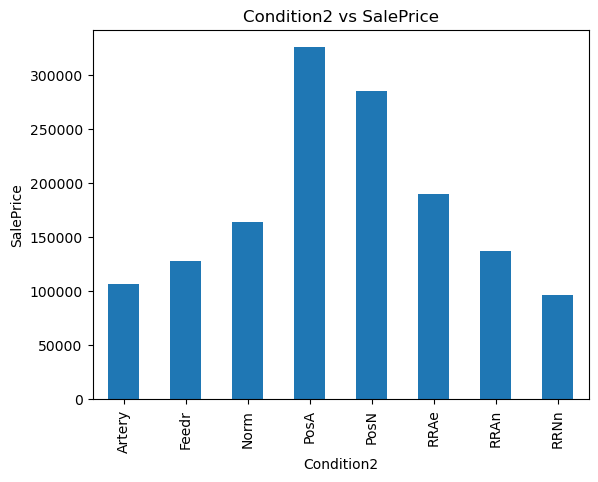

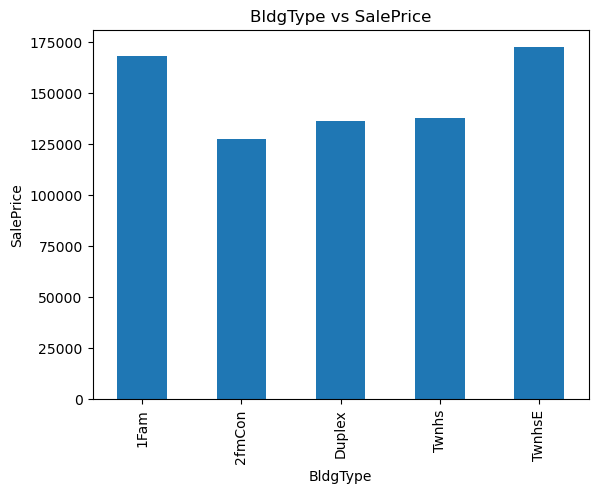

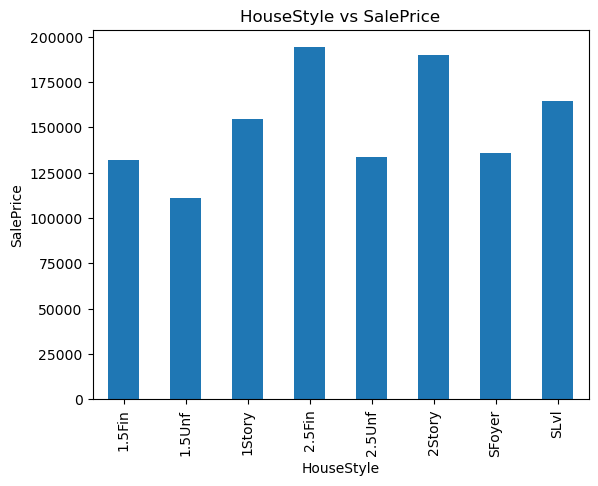

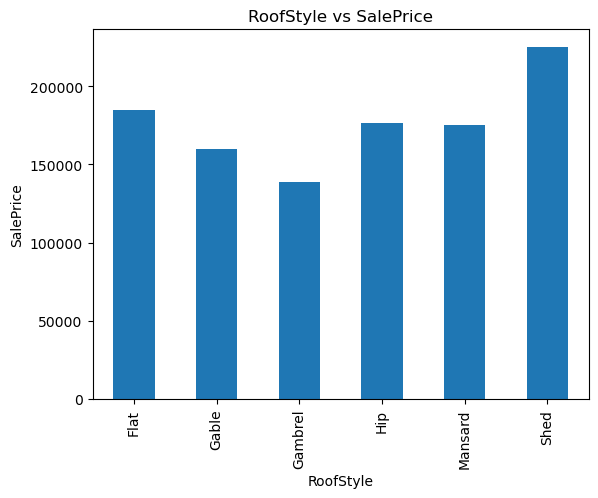

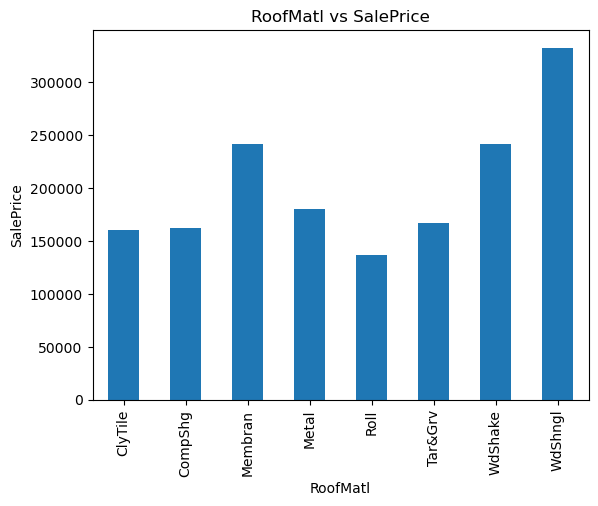

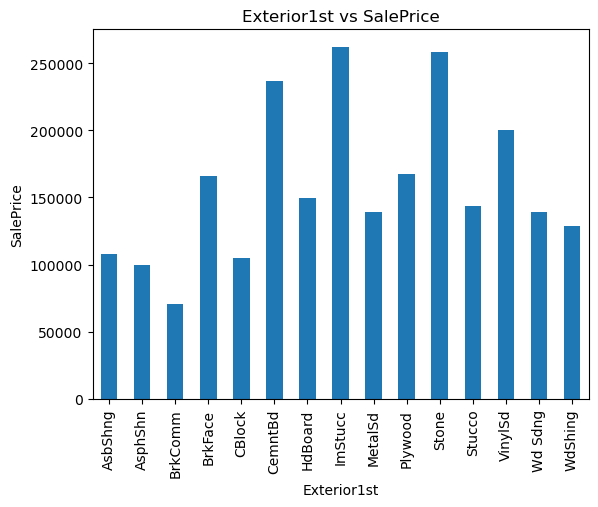

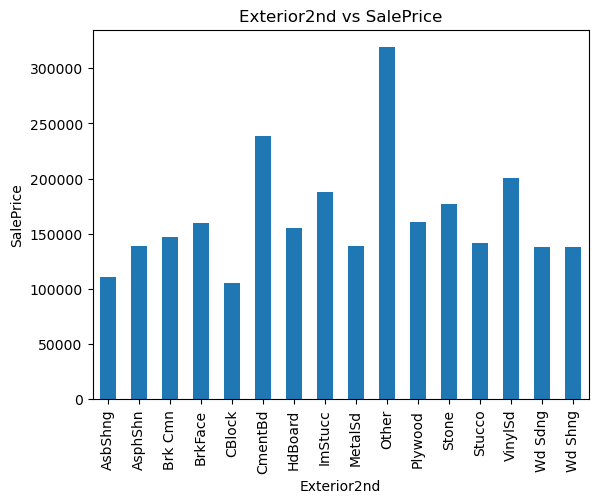

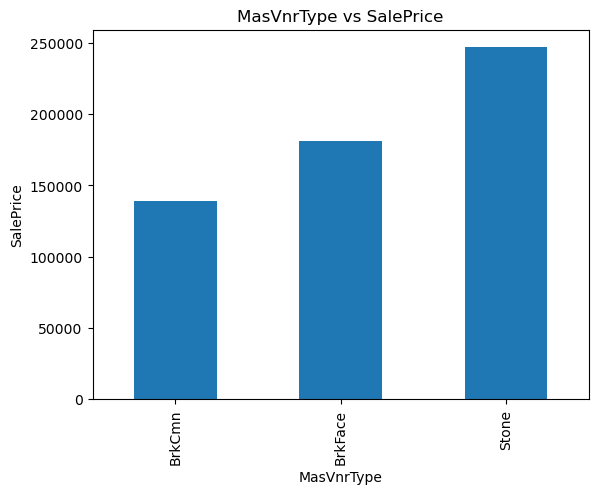

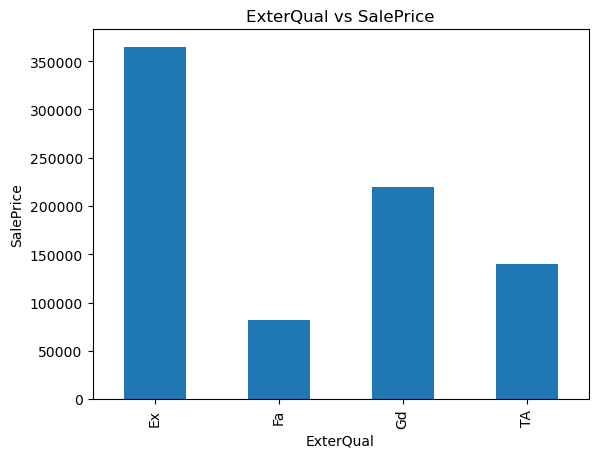

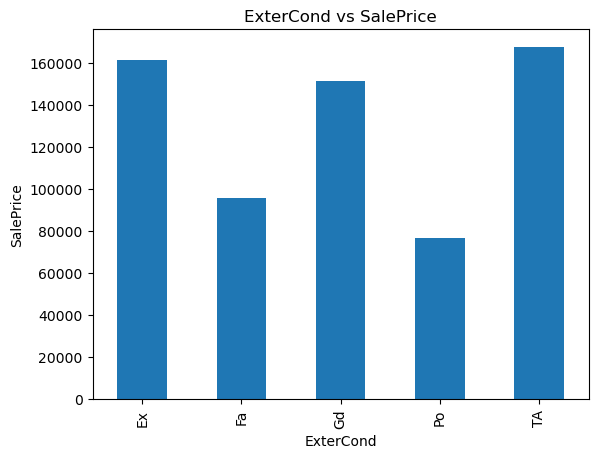

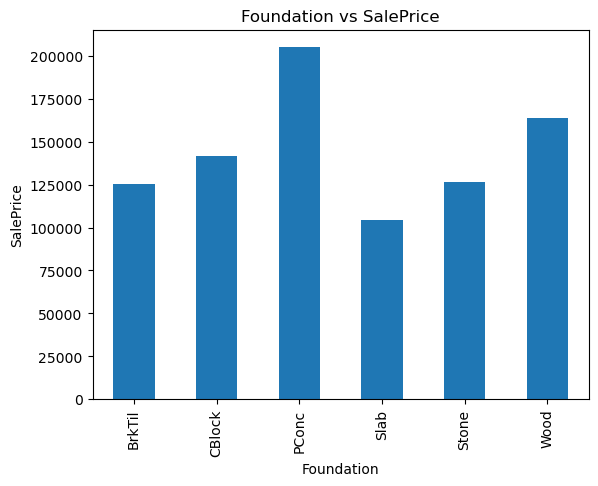

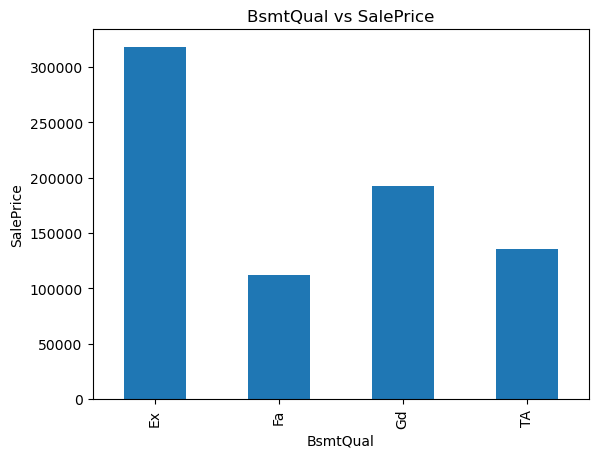

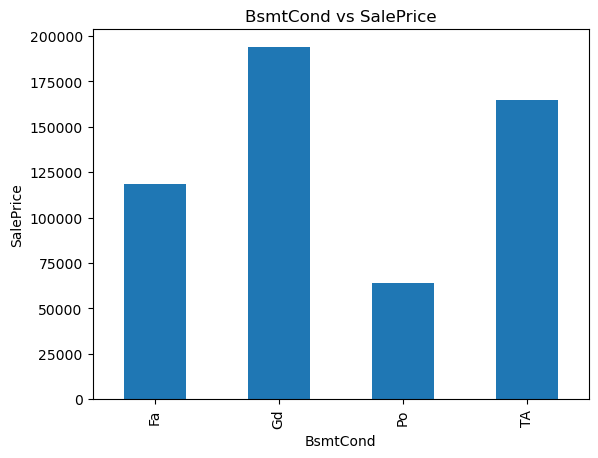

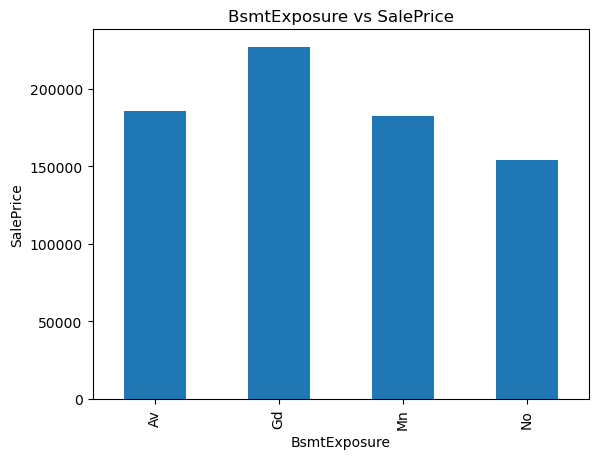

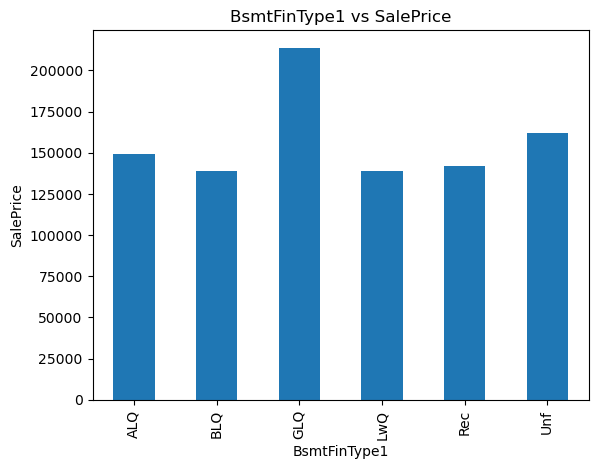

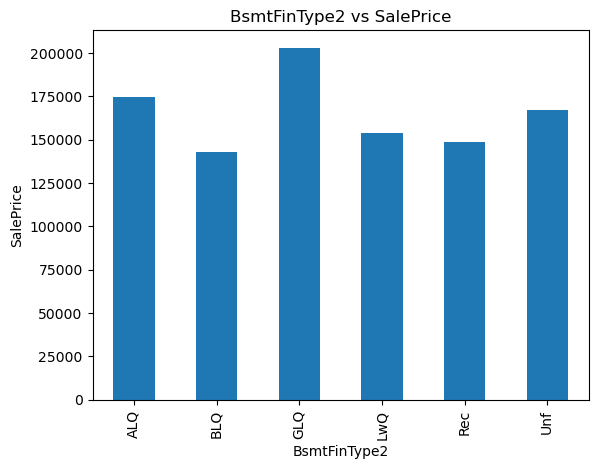

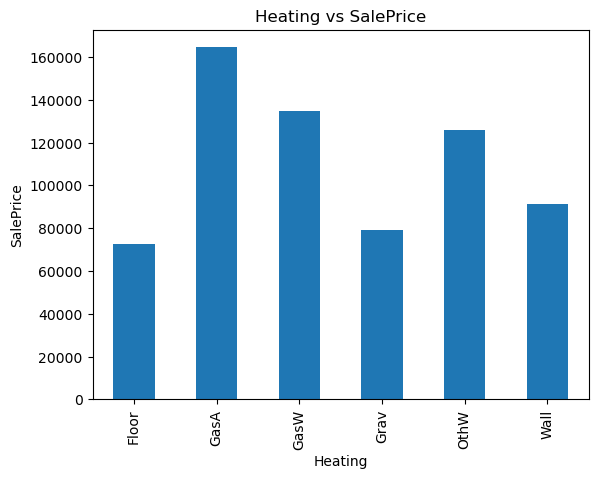

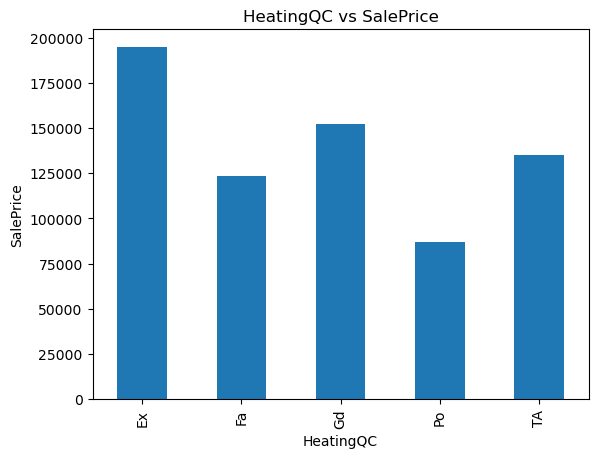

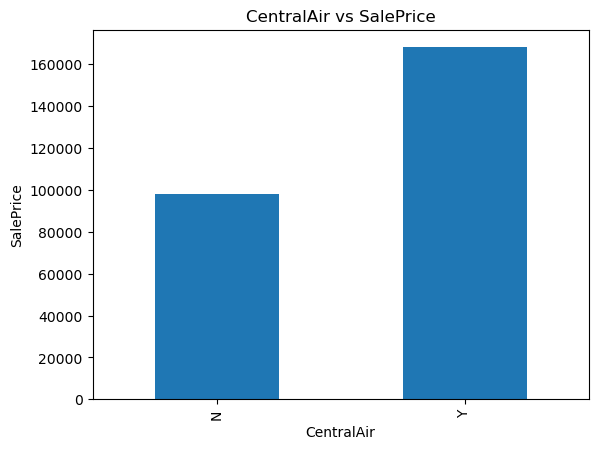

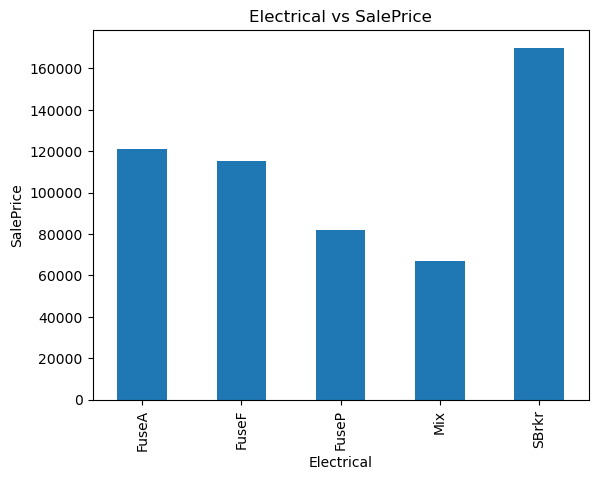

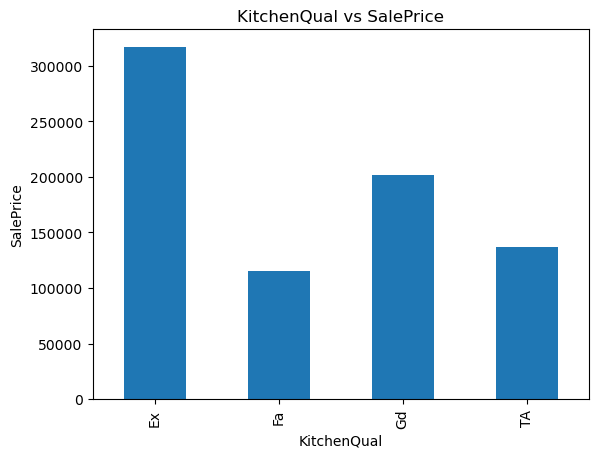

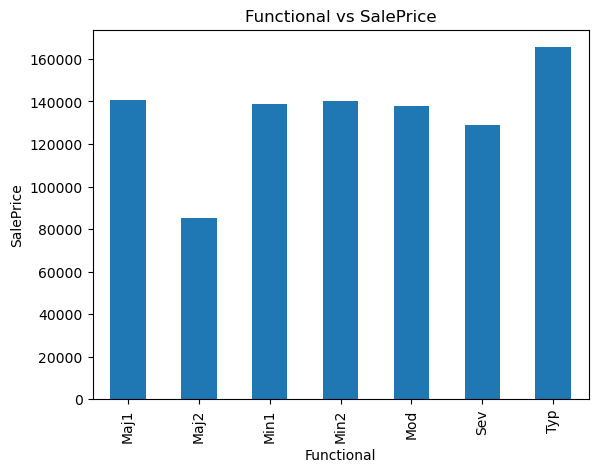

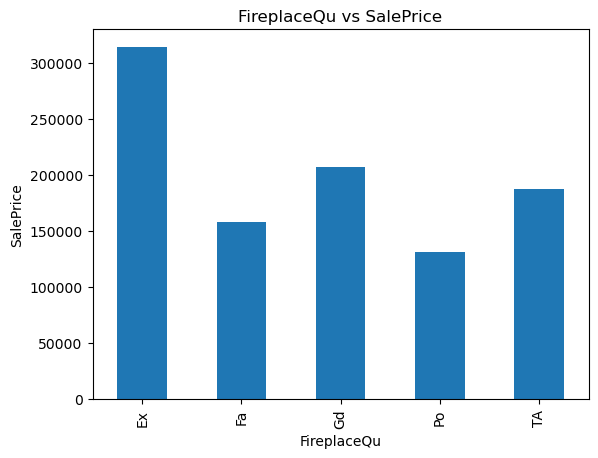

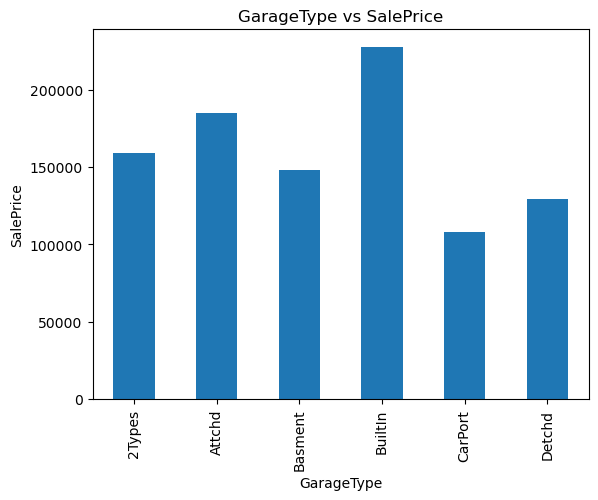

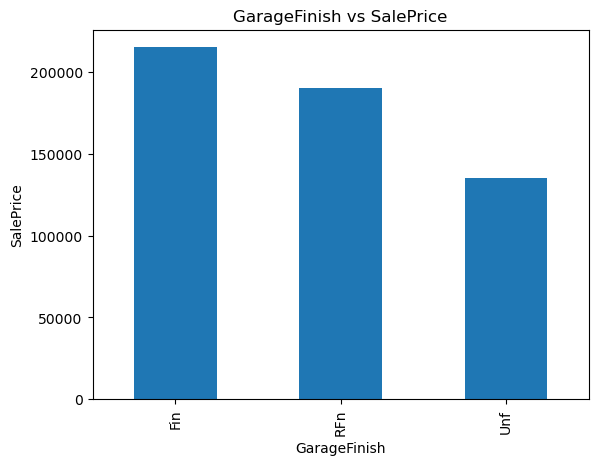

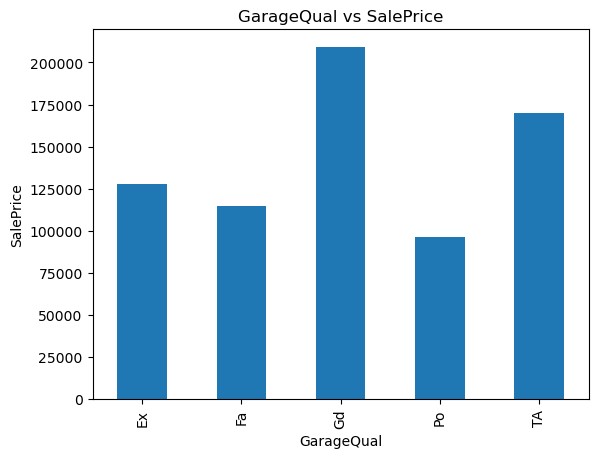

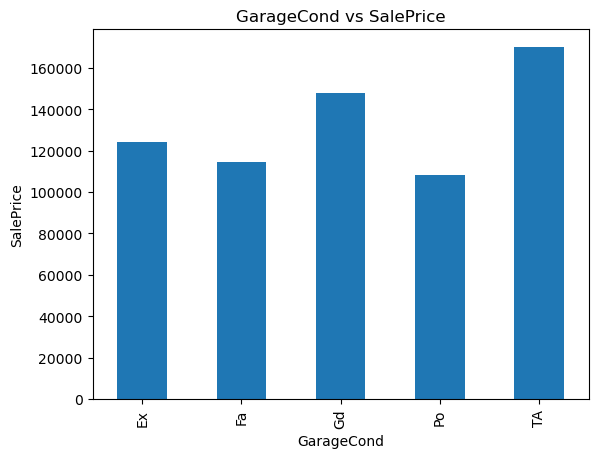

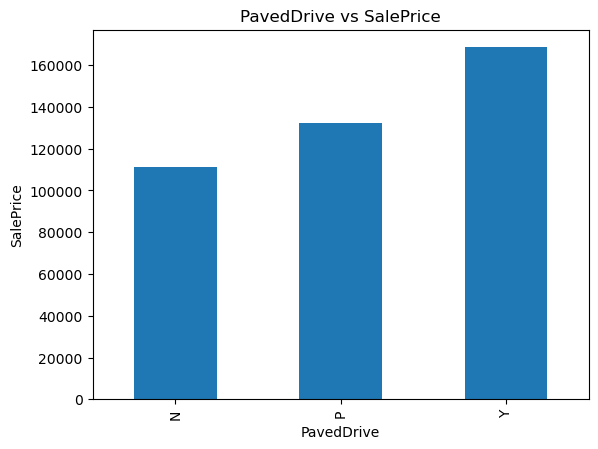

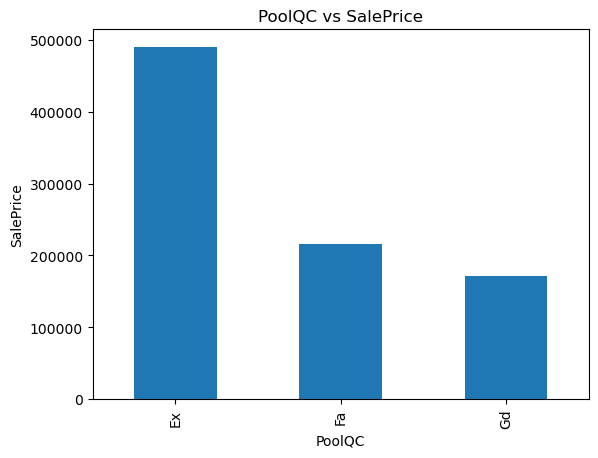

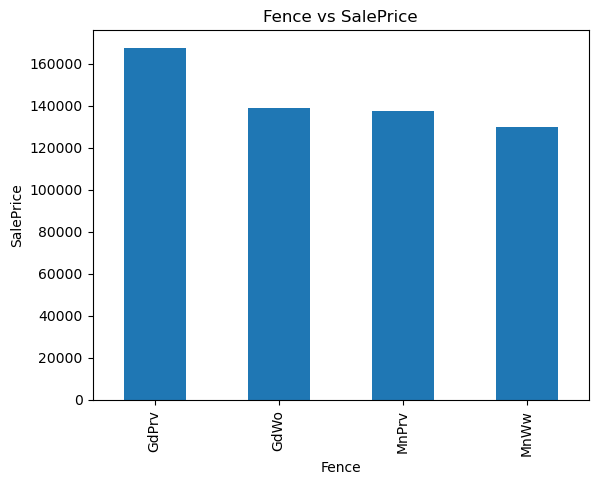

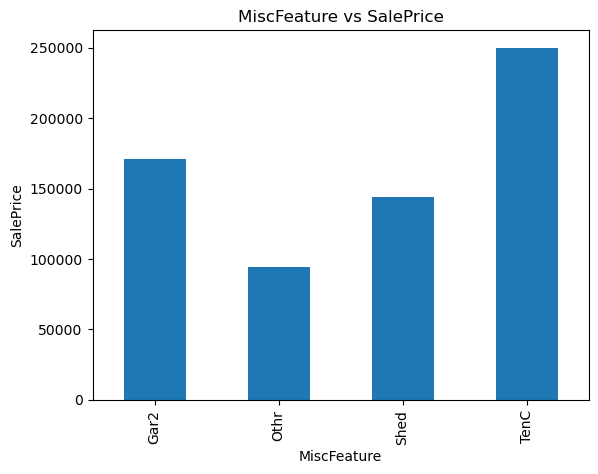

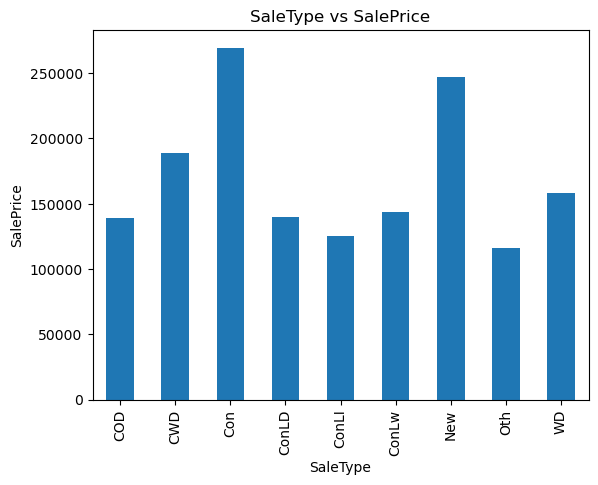

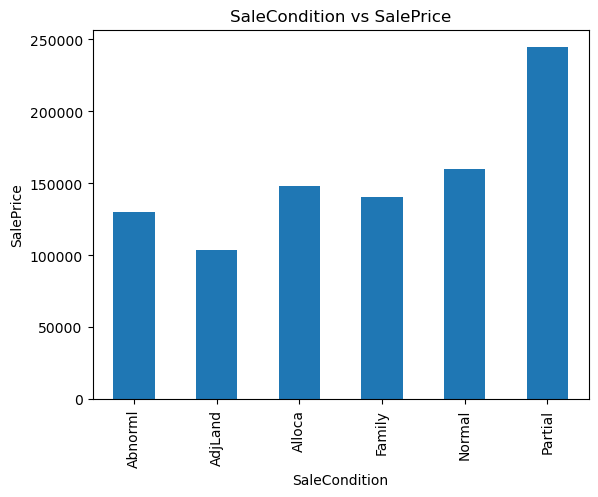

In [29]:
data = df_train.copy()

for feature in categorical_features:
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title('{} vs SalePrice'.format(feature))
    plt.show()

***Findings:***

- MSZoning: The general zoning classification 
    - For zone 'FV' & 'RL' the median values for houses are quite higher than other zones.
    - Cheapest house prices are seen for zone C.
- Street: Type of road access
    - Houses with paved street have higher rates than the ones having gravelled street outside the houses.
- Alley: Type of alley access
    - Houses with paved alley is costlier than the ones having gravelled alley.
    - Median sale price value for house with paved ally is around  172,000 USD.
    - Median sale price value for house with gravelled ally is around 122,000 USD.
- LotShape: General shape of property
    - IR2 category houses are the most expensive ones when compared to other categories.
- LandContour: Flatness of the property
    - Property in hills(HLS) are the most expensive ones when compared to other areas.
    - Cheapest properties can be found in river bank areas(BNK)
- BldgType: Type of dwelling
    - '1Fam' & 'TwnhsE' building type are the most expensive types of dwelling.
 